# 1st homework: R Group (Fabian, Mi, Xueting, Yu)

In [1]:
install.packages('gdata')     # to read in spreadsheets
install.packages('dplyr')     # filtering, mapping and aggregating functionality
install.packages('tidyverse') # includes ggplot2 for plotting

In [2]:
# includes previously installed packages

library(readxl)
library(dplyr)
library(ggplot2)

1. Provide a script and html file which generates/shows for each of the 3
resolutions a separated chart, visualizing the mean values of the video quality
ratings and the 95 confidence interval in form of a bar plot. Use all available
framerate bitrate pairs on the x axis and the game as grouping variable
(number of plots 3 dataset Gaming_Video_Quality_dataset xlsx)

In [3]:
# reads in speadsheet
gaming_video_quality_data <- read_excel("datasets/DB01_gaming_video_quality_dataset.xlsx")

In [4]:
game_framerate_bitrate <- gaming_video_quality_data %>%         # loads dataset
group_by(Resolution, Game, Framerate, Bitrate) %>%              # groups by Resolution, Game, Framerate, Bitrate
summarise(n=n(), mean_VQ = mean(VQ), std_dev_VQ= sd(VQ)) %>%    # gets amount of rows per group, mean & std dev of VQ
mutate(ci_half=std_dev_VQ/sqrt(n) * qt(1-0.05/2, n-1)) %>%      # = half width of confidence interval based on t distribution
arrange(Resolution, Framerate, Bitrate, Game) %>%               # ordered output
mutate(ResolutionP=paste(Resolution,'p')) %>%                    # unit of resolution
arrange(desc(ResolutionP,Framerate, Bitrate, Game))

game_framerate_bitrate

Resolution,Game,Framerate,Bitrate,n,mean_VQ,std_dev_VQ,ci_half,ResolutionP
720,Game1,30,1000,25,2.948000,0.9548647,0.3941488,720 p
720,Game2,30,1000,25,3.356000,0.6922668,0.2857537,720 p
720,Game3,30,1000,25,3.204000,0.6949101,0.2868448,720 p
720,Game4,30,1000,22,3.350000,0.6681531,0.2962425,720 p
720,Game5,30,1000,22,2.781818,0.6115058,0.2711265,720 p
720,Game6,30,1000,22,2.900000,0.5623082,0.2493135,720 p
720,Game1,30,2000,25,3.656000,0.5515735,0.2276784,720 p
720,Game2,30,2000,25,4.336000,0.6156839,0.2541418,720 p
720,Game3,30,2000,25,3.952000,0.8052536,0.3323923,720 p
720,Game4,30,2000,22,4.227273,0.7238665,0.3209444,720 p


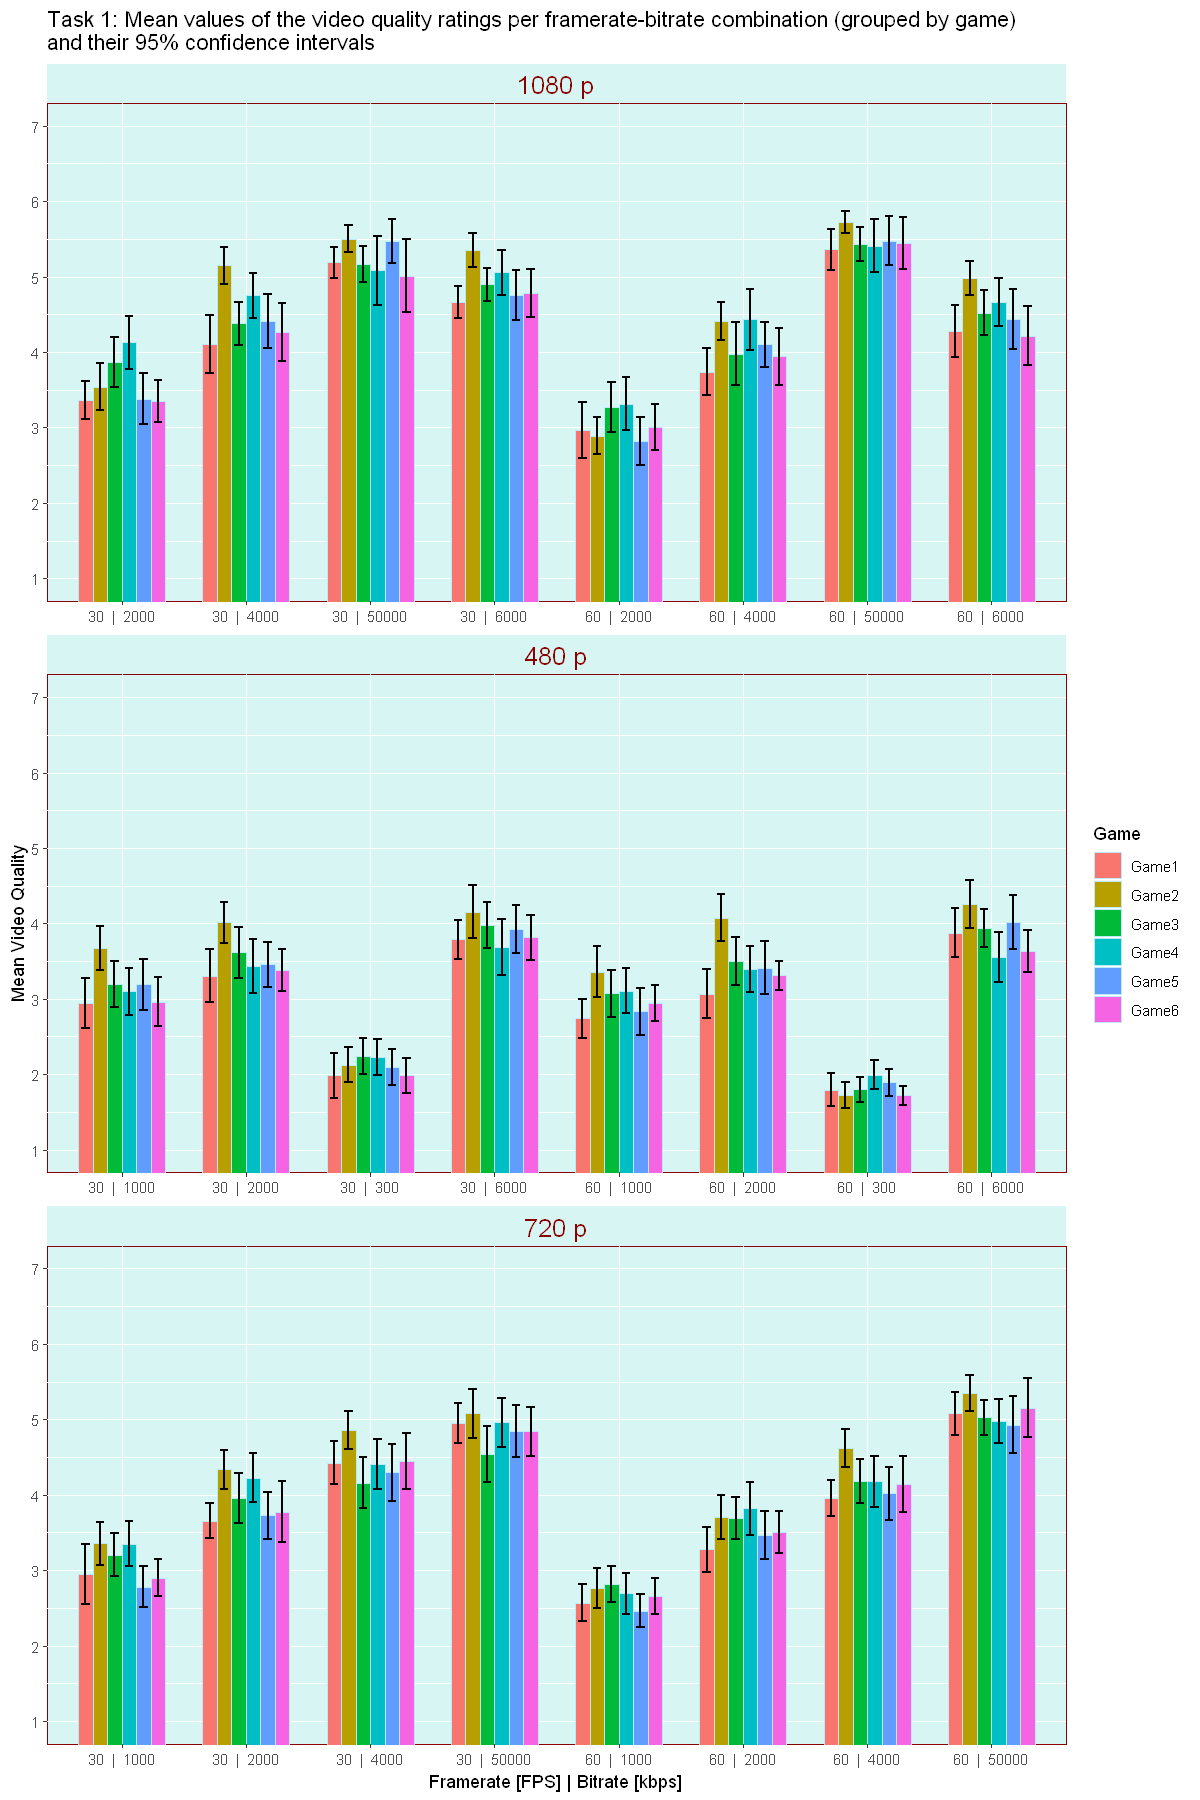

In [5]:
# figure dimensions
options(repr.plot.width=10, repr.plot.height=15)  

# main plots
ggplot(game_framerate_bitrate, aes(x = paste(Framerate, ' | ', Bitrate), y = mean_VQ, fill = Game, color= Game)) + 
# as bar chart
geom_bar(stat="identity", position=position_dodge(), width = 0.7, color='#bcebf7') + 
# aligned in single solumn
facet_wrap( ~ ResolutionP, ncol = 1, scales='free') +
# confidence intervals
geom_errorbar(aes(ymin=mean_VQ-ci_half, ymax=mean_VQ+ci_half), width=0.4, colour="black", size=0.6, position=position_dodge(0.7)) + 
# VQ only from 1-7
coord_cartesian( ylim=c(1,7)) + 
scale_y_continuous(breaks=seq(1,7,1)) + 
labs(x = "Framerate [FPS] | Bitrate [kbps]", y = "Mean Video Quality") + 
ggtitle("Task 1: Mean values of the video quality ratings per framerate-bitrate combination (grouped by game)\nand their 95% confidence intervals")  + 
theme( panel.background = element_rect(fill = '#d7f5f2', colour = 'darkred'), strip.background = element_rect(fill='#d7f5f2'),
              strip.text = element_text(size=15, colour='darkred')) 

2. Provide a script and html file which generates/shows a box plot separated for
each game, visualizing the video quality ratings ( for the condition IDs 15
43 and 66 (they are all the same) representing the following combination of
parameters resolution 480 framerate 30 bitrate 300 ))(number of plots 6
dataset Gaming_Video_Quality_dataset xlsx)

In [6]:
# conditions to investigate
ids <- c(15, 43, 66)
# select needed aggregation data for conditions
games_VQ <- gaming_video_quality_data %>% 
            filter(Condition %in% ids) %>% 
            select(Game, VQ, Condition) %>%
            mutate( Game_Cond=paste(Game, ' ( condition ', Condition, ')') )

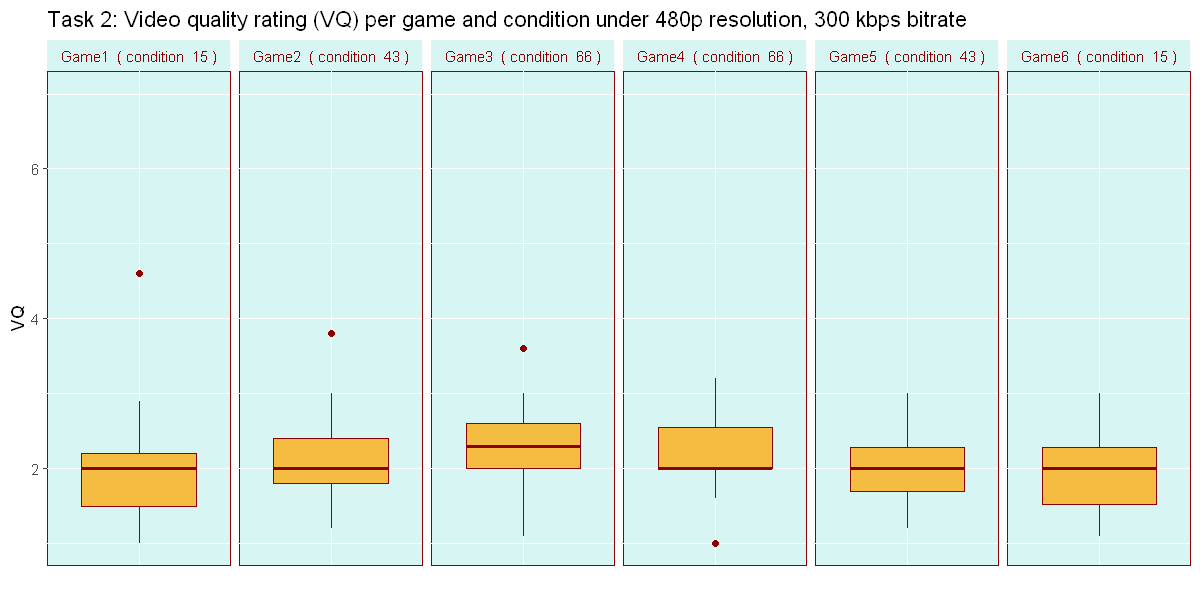

In [7]:
# figure dimensions
options(repr.plot.width=10, repr.plot.height=5)
# main plots
ggplot(games_VQ, aes( x = "", y = VQ)) + 
# as boxplot
geom_boxplot(fill='#f5bc42', color="darkred") + 
# limit y axis
ylim(1, 7) + 
# wrap boxplots in single row with each titles
facet_wrap( ~ Game_Cond, nrow = 1) + 
ggtitle("Task 2: Video quality rating (VQ) per game and condition under 480p resolution, 300 kbps bitrate") + 
theme( axis.ticks.x = element_blank(),axis.title.x=element_blank(), panel.background = element_rect(fill = '#d7f5f2', colour = 'darkred'), strip.background = element_rect(fill='#d7f5f2'),
              strip.text = element_text(size=9, colour='darkred')) 

3. Provide a script and html files which generates/shows a stacked histogram
(sum of both groups on top of each other for each bar/bin) visualizing the age
distribution (grouped by gender) of participants in the speaker likeability dataset
(number of plots: 1, dataset: speaker likeability/speech_quality_ratings.xlsx)

In [8]:
# loads dataset
speech_quality_ratings_data <- read_excel("datasets/DB02_speaker_likeability_quality_ratings.xlsx")

# for relative amounts:
gender_age_p <- speech_quality_ratings_data %>% 
# groups by gender & age
group_by(Gender, Age) %>%
# takes count per group
summarise(count = n() ) %>% 
# maps to relative amount
mutate( Amount = count / sum(count))

# for absolute amounts:
gender_age <- speech_quality_ratings_data %>% 
group_by(Gender, Age) %>% 
summarise(Count = n())

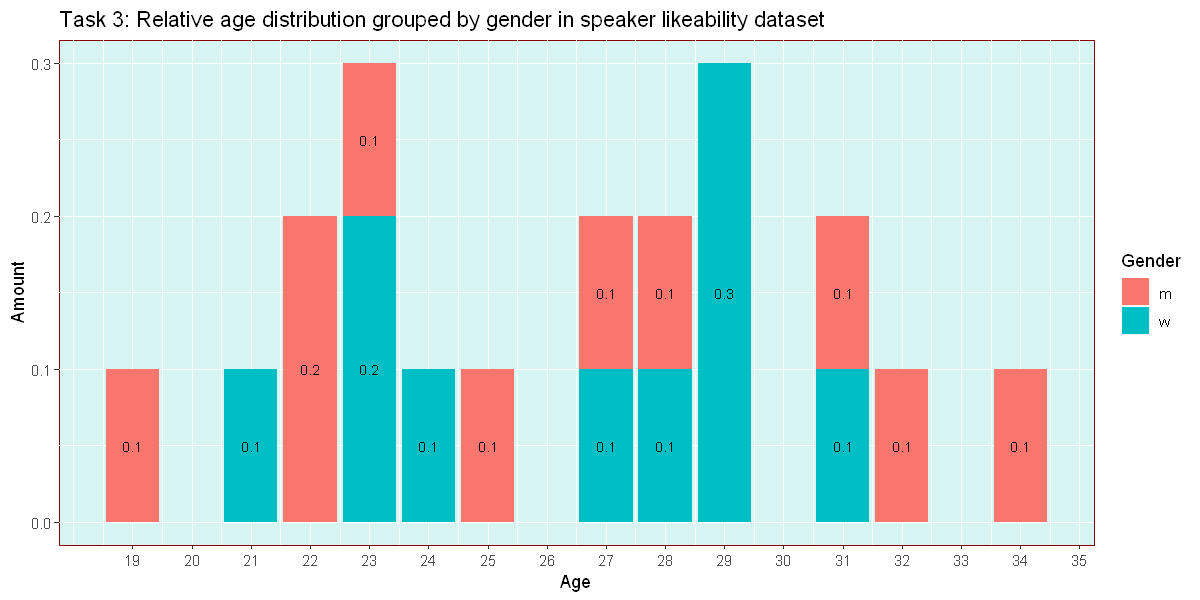

In [9]:
# main plot
ggplot(gender_age_p, aes(y = Amount, x = Age, fill = Gender, label = Amount)) + 
# as bar plot
geom_bar(stat="identity") + 
# x axis from 19 to 35 with step 1
scale_x_continuous(breaks=seq(19,35,1)) + 
geom_text(size = 3, position = position_stack(vjust = 0.5)) + 
ggtitle("Task 3: Relative age distribution grouped by gender in speaker likeability dataset") +
theme( panel.background = element_rect(fill = '#d7f5f2', colour = 'darkred'), strip.background = element_rect(fill='#d7f5f2'),
              strip.text = element_text(size=15, colour='darkred')) 

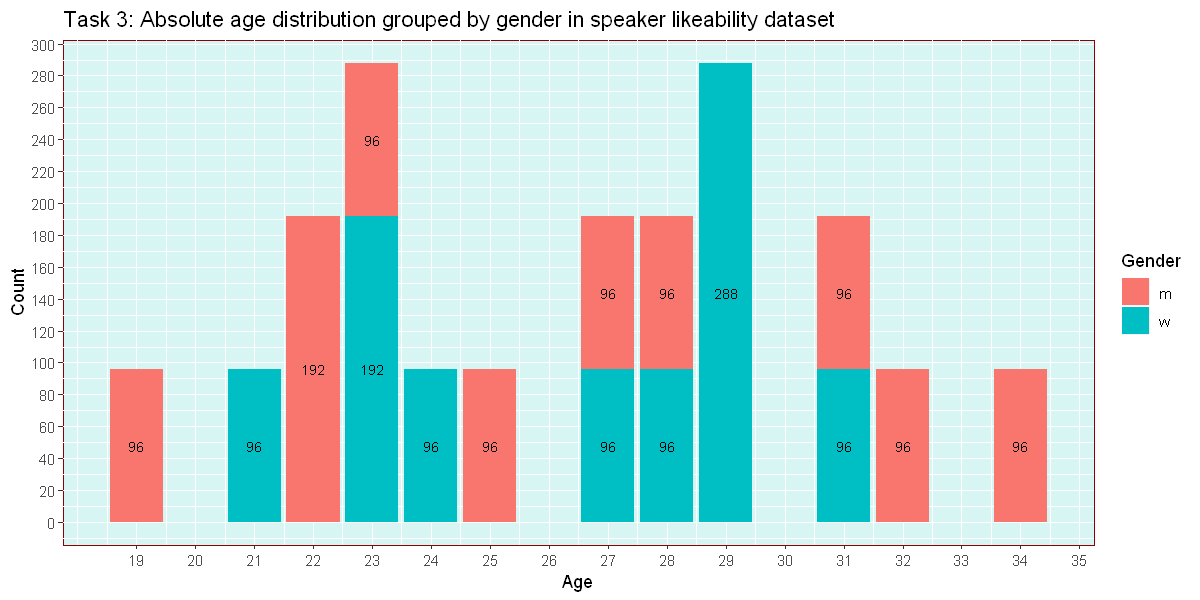

In [10]:
# main plot
ggplot(gender_age, aes(y = Count, x = Age, fill = Gender, label = Count)) + 
# as bar plot
geom_bar(stat="identity") + 
# scales x and y axis accordingly
scale_x_continuous(breaks=seq(19,35,1)) +  
scale_y_continuous(breaks=seq(0,300,20)) +
geom_text(size = 3, position = position_stack(vjust = 0.5)) + 
ggtitle("Task 3: Absolute age distribution grouped by gender in speaker likeability dataset") + 
theme( panel.background = element_rect(fill = '#d7f5f2', colour = 'darkred'), strip.background = element_rect(fill='#d7f5f2'),
              strip.text = element_text(size=15, colour='darkred')) 